In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lea_utils import norm_values
from lea_utils import SimulatorLEA
#%matplotlib tk  #Desabilita exibição de plot inline no notebook

In [2]:
#Intancia do simulador
simulador=SimulatorLEA()
#Carregar dados experimentais
filepath="./dados_experimentais/Dados_BCSLEA_20210818.mat"
intervalo_horas=(0,7) #Janela de simulação em horas escolhida com base no histórico de dados
simulador.getLEAdata(filepath,intervalo_horas)

0
 File loaded ./dados_experimentais/Dados_BCSLEA_20210818.mat


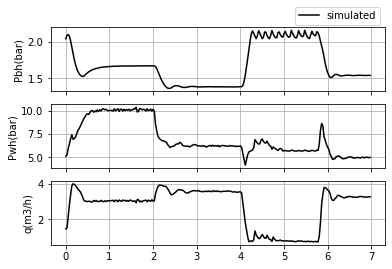

In [11]:
#Mostrar os dados de exógenas e estados
simulador.BCS_EXP.plot_ss

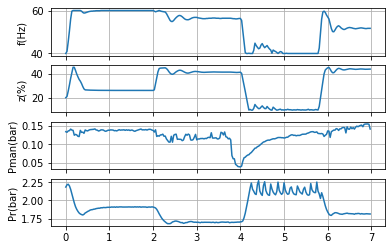

In [4]:
simulador.BCS_EXP.plot_u

### Simulação para confrontar com os dados experimentais

In [5]:
# =========================================================================
#  carrega as entradas, estados e valores iniciais do BCS LEA   
# =========================================================================
fk,zc,pman,pres=simulador.BCS_EXP.get_exo_values() # Armazenamento dos valores das exógenas
pbh,pwh,q=simulador.BCS_EXP.get_ss_values() # Armazenamento dos valores dos estados
u_0=np.array([fk[0],zc[0],pman[0],pres[0]]) #Valor inicial de entrada
u_exp=np.array([fk,zc,pman,pres])#Empacotamento entradas exógenas experimentais
x_0=np.array([pbh[0],pwh[0],q[0]])#Empacotamento valor inicial para os estados
x_exp=[pbh,pwh,q]
xss=x_0;uss=u_0 #Iniciar a simulação - nos valores iniciais
#####################################################
nsim=simulador.BCS_EXP.nsim# Time-steps para simulação
ts=simulador.BCS_EXP.ts #Sampling tim
tempo_hora = np.arange(0,nsim*ts,ts)/3600 # vetor de tempo em horas

In [6]:
####################
#Obter os fatores de escalonamento para simulação
xc,x0=norm_values()
####################
xssn = (xss-x0)/xc
#### Transformação para unidades de engenharia (bar, m3/h)
xscale=np.array([1/1e5,1/1e5,3600])
####


In [12]:
#####################
#Definindo entradas exógenas a ser utilizada
uk_1=u_exp.T
##################
xssn=simulador.regime_estacionario()(xssn,uss) #valor inicial normalizado
xpk=simulador.PredictionModel(ts)(xssn,uss)
xpks=xpk*xc+x0
#Inicialização do vetor de estados
Xk=xpks
#Inicialização do vetor de entradas exogenas
Uk= np.array(uss).reshape(1,4)
from tqdm.notebook import tqdm
for k in tqdm(range(1,nsim)):
    xpk = simulador.PredictionModel(ts)(xpk,uk_1[k:k+1,:])
    xpks=xpk*xc+x0
    Xk = np.concatenate((Xk,xpks),axis=0) #desnormalizar x e preencher vetor
    Uk = np.concatenate((Uk,uk_1[k:k+1,:]),axis=0)
Xk=[Xk[:,i] for i in range(3)]
Uk=[Uk[:,i] for i in range(4)]

  0%|          | 0/251 [00:00<?, ?it/s]

### Resultados

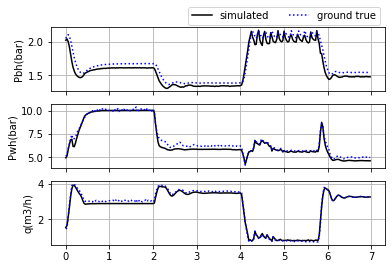

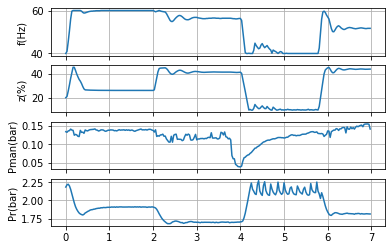

In [13]:
Fig_sim=simulador.plotLEA.plot_states([Xk,x_exp],tempo_hora)
Fig_sim=simulador.plotLEA.plot_exogenous(Uk,tempo_hora)

In [10]:
fig1=plt.figure()
label = [r'$p_{in}(bar)$','H(m)','P','I','qc','qr' ];
for iy in range(0,npv):
    ax = fig1.add_subplot(npv,1,iy+1)
    #print(iy)
    if iy == 0: # Pin
        ax.plot(xi,(Yk[iy,:].T)/1e5, label='Medição')
        #ax.plot(xi,Ymk[iy,:].T/1e5, label='EKF')
        ax.set_ylabel(label[iy])
        ax.set(xlim=(xi[0], nsim*ts))
       # ax.set(ylim=(40,62))
        plt.grid(True)
    else: # H
        ax.plot(xi,Yk[iy,:].T, label='Medição')
        #ax.plot(xi,Ymk[iy,:].T,label='EKF')
        ax.set_ylabel(label[iy])
        ax.set(xlim=(xi[0], nsim*ts))
       # ax.set(ylim=(580, 850))
        plt.grid(True)
#ax.plot(xi,Yk[2,:].T, label='EKF')
ax.legend();
ax.set_xlabel('Time (nT)')
fig1.show()


NameError: name 'npv' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# #exec(compile(open('envelope.py', "rb").read(), 'envelope.py', 'exec')) #% Roda arquivo com parâmetros do modelo BCS
# fig4,ax4=plt.subplots()
# plt.grid(True)
# #BCS['Envelope']['fig'](ax4); # grafico do envelope
# #
# # Evolução dentro do envelope
# ax4.plot(Xk[2,0:].T*3600,Yk[1,0:].T,'--k')
# ax4.plot(Xk[2,0]*3600,Yk[1,0],'o')#,'MarkerFaceColor',[0,1,0],'MarkerEdgeColor',[0,0,0])
# ax4.plot(Xk[2,-1]*3600,Yk[1,-1],'o')#,'MarkerFaceColor',[1,0,0],'MarkerEdgeColor',[0,0,0])
# ax4.annotate('t=0',
#              xy=(float(Xk[2,0]*3600),float(Yk[1,0])),
#              xytext=(float(Xk[2,0]*3600)-5,float(Yk[1,0])+10),
#              arrowprops=dict(facecolor='green', shrink=0.01))

# ax4.annotate('t='+str(nsim),
#              xy=(float(Xk[2,-1]*3600),float(Yk[1,-1])),
#              xytext=(float(Xk[2,-1]*3600)-7,float(Yk[1,-1])+10),
#              arrowprops=dict(facecolor='red', shrink=0.01))
# plt.show()

